# Przewidywanie statusu firm z branży 4.0

### Cel
Celem projektu jest przygotowanie danych i porównanie płytkich oraz głębokich modeli uczenia maszynowego dla otrzymanego zbioru danych.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import glob

### PKD - Polska Klasyfikacja Działalności

W projekcie będziemy analizowali dane dla firm z następującymi kodami *pkd*:
- 2712Z - Produkcja aparatury rozdzielczej i sterowniczej energii elektrycznej
- 2790Z - Produkcja pozostałego sprzętu elektrycznego
- 2841Z - Produkcja maszyn do obróbki metalu
- 2899Z - Produkcja pozostałych maszyn specjalnego przeznaczenia, gdzie indziej niesklasyfikowana
- 3312Z - Naprawa i konserwacja maszyn
- 3320Z - Instalowanie maszyn przemysłowych, sprzętu i wyposażenia
- 4321Z - Wykonywanie instalacji elektrycznych

In [2]:
pkd_bazowe = ['2712Z', '2790Z', '2841Z', '2899Z', '3312Z', '3320Z', '4321Z']

In [3]:
csv_columns = ['nazwa','adresDzialanosci_gmina',
'adresDzialanosci_miasto', 'wlasciciel_imie', 'wlasciciel_nazwisko',
'2712Z', '2790Z', '2841Z', '2899Z', '3312Z', '3320Z', '4321Z',
'pkd_total', 'data_rozpoczecia', 'data_zakonczenia','data_wykreslenia', 'status']

with open('./data.csv', "w", newline='', encoding="utf8") as output:
    writer = csv.DictWriter(output, fieldnames=csv_columns)
    writer.writeheader()

    for f_path in glob.glob('./UJ/ceidg/firmy/12/**/*.json'):
        with open(f_path, encoding="utf8") as f:
            data = json.load(f)
            data_output = dict()

            try:
                data_output['nazwa'] = data['firma'][0]['nazwa']
            except:
                data_output['nazwa'] = "NaN"
            
            try:
                data_output['adresDzialanosci_gmina'] = data['firma'][0]['adresDzialanosci']['gmina']
            except:
                data_output['adresDzialanosci_gmina'] = "NaN"
            
            try:
                data_output['adresDzialanosci_miasto'] = data['firma'][0]['adresDzialanosci']['miasto']
            except:
                data_output['adresDzialanosci_miasto'] = "NaN"

            try:
                data_output['wlasciciel_imie'] = data['firma'][0]['wlasciciel']['imie']
            except:
                data_output['wlasciciel_imie'] = "NaN"
            
            try:
                data_output['wlasciciel_nazwisko'] = data['firma'][0]['wlasciciel']['nazwisko']
            except:
                data_output['wlasciciel_nazwisko'] = "NaN"


            pkd = []
            try:
                pkd.append(data['firma'][0]['pkdGlowny'])
            except:
                pass
            try:
                pkd += data['firma'][0]['pkd']
            except:
                pass
            pkd = set(pkd)

            for pkd_baz in pkd_bazowe:
                if pkd_baz in pkd:
                    data_output[pkd_baz] = "1"
                else:
                    data_output[pkd_baz] = "0"

            data_output['pkd_total'] = len(pkd)


            try:
                data_output['data_rozpoczecia'] = data['firma'][0]['dataRozpoczecia']
            except:
                data_output['data_rozpoczecia'] = "NaN"

            try:
                data_output['data_zakonczenia'] = data['firma'][0]['dataZakonczenia']
            except:
                data_output['data_zakonczenia'] = "NaN"

            try:
                data_output['data_wykreslenia'] = data['firma'][0]['dataWykreslenia']
            except:
                data_output['data_wykreslenia'] = "NaN"

            try:
                data_output['status'] = data['firma'][0]['status']
            except:
                data_output['status'] = "NaN"


            writer.writerow(data_output)

In [4]:
df = pd.read_csv('data.csv')

In [5]:
print(df.shape)

(67550, 17)


In [8]:
df.sample(3)

,nazwa,adresDzialanosci_gmina,adresDzialanosci_miasto,wlasciciel_imie,wlasciciel_nazwisko,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,data_zakonczenia,data_wykreslenia,status
31465,Marek Syma SYMNET,Olkusz,Olkusz,Marek,Syma,0,0,0,0,1,1,0,8,2011-10-05,2014-11-24,2014-11-25,WYKRESLONY
28507,ELEKTROSERWIS JAN SPYTKOWSKI,Jabłonka,Jabłonka,JAN,SPYTKOWSKI,0,0,0,0,0,0,1,2,2019-08-22,NaN,NaN,AKTYWNY
63060,VIN-CO KRZYSZTOF KONECKI,Kraków-Nowa Huta,Kraków,KRZYSZTOF,KONECKI,0,0,0,0,0,0,1,29,2019-07-08,NaN,NaN,AKTYWNY


In [6]:
df.columns

Index(['nazwa', 'adresDzialanosci_gmina', 'adresDzialanosci_miasto',
       'wlasciciel_imie', 'wlasciciel_nazwisko', '2712Z', '2790Z', '2841Z',
       '2899Z', '3312Z', '3320Z', '4321Z', 'pkd_total', 'data_rozpoczecia',
       'data_zakonczenia', 'data_wykreslenia', 'status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67550 entries, 0 to 67549
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   nazwa                    67068 non-null  object
 1   adresDzialanosci_gmina   67064 non-null  object
 2   adresDzialanosci_miasto  67056 non-null  object
 3   wlasciciel_imie          67068 non-null  object
 4   wlasciciel_nazwisko      67068 non-null  object
 5   2712Z                    67550 non-null  int64 
 6   2790Z                    67550 non-null  int64 
 7   2841Z                    67550 non-null  int64 
 8   2899Z                    67550 non-null  int64 
 9   3312Z                    67550 non-null  int64 
 10  3320Z                    67550 non-null  int64 
 11  4321Z                    67550 non-null  int64 
 12  pkd_total                67550 non-null  int64 
 13  data_rozpoczecia         67068 non-null  object
 14  data_zakonczenia         19268 non-nul

In [9]:
df.drop(['nazwa', 'wlasciciel_imie', 'wlasciciel_nazwisko', 'data_zakonczenia', 'data_wykreslenia'], inplace=True, axis=1)
df.columns

Index(['adresDzialanosci_gmina', 'adresDzialanosci_miasto', '2712Z', '2790Z',
       '2841Z', '2899Z', '3312Z', '3320Z', '4321Z', 'pkd_total',
       'data_rozpoczecia', 'status'],
      dtype='object')

In [10]:
df.sample(3)

,adresDzialanosci_gmina,adresDzialanosci_miasto,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,status
60147,Kraków-Podgórze,Kraków,0,0,0,0,0,0,1,22,2016-09-02,AKTYWNY
26852,Czarny Dunajec,Odrowąż,0,0,0,0,0,0,1,21,2006-10-20,AKTYWNY
33315,Oświęcim,Oświęcim,0,0,0,0,0,0,0,58,2017-12-15,AKTYWNY


<AxesSubplot:xlabel='status'>

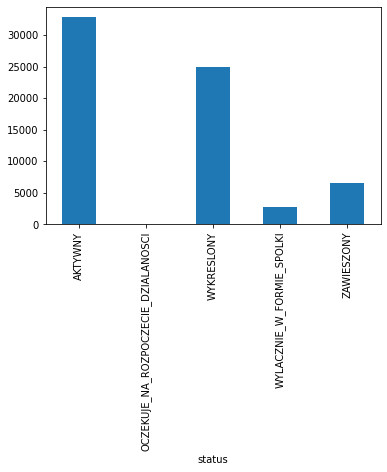

In [12]:
status = df.groupby(['status']).size()
status.plot(kind="bar")

<AxesSubplot:xlabel='status'>

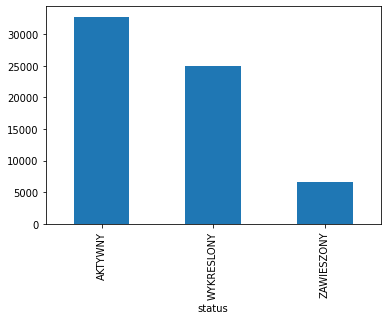

In [15]:
df = df[(df['status'] != 'WYLACZNIE_W_FORMIE_SPOLKI') & (df['status'] != 'OCZEKUJE_NA_ROZPOCZECIE_DZIALANOSCI')]

status = df.groupby(['status']).size()
status.plot(kind="bar")

<AxesSubplot:xlabel='adresDzialanosci_gmina'>

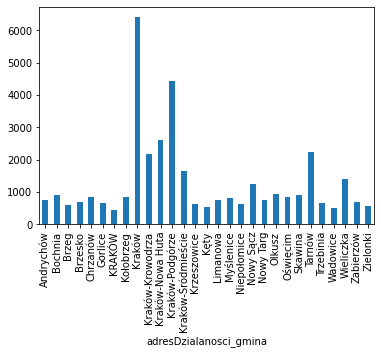

In [16]:
gminy = df.groupby(['adresDzialanosci_gmina']).size()

gminy = gminy.where(gminy > 430)
gminy = gminy.dropna()
gminy.plot(kind="bar")

<AxesSubplot:xlabel='data_rozpoczecia'>

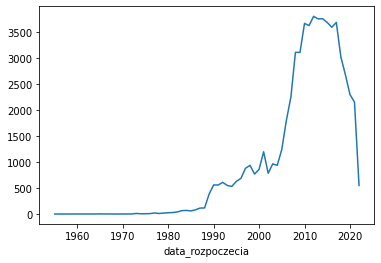

In [23]:
df['data_rozpoczecia'] = pd.to_datetime(df['data_rozpoczecia'])

lata = df.groupby(df['data_rozpoczecia'].map(lambda x: x.year)).size()
lata.plot()

In [24]:
df.tail(5)

,adresDzialanosci_gmina,adresDzialanosci_miasto,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,status
67545,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaN
67546,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaN
67547,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaN
67548,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaN
67549,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaN


In [31]:
df = df.dropna()

print(df.shape)

(64321, 12)
